In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
dt = pd.read_csv("C:/Users/MSI/Downloads/mlcourse/flight_delays_test.csv")
dt.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [73]:
dt.shape

(100000, 8)

In [74]:
dt.ndim

2

In [75]:
dt.tail()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
99995,c-6,c-5,c-2,852,WN,CRP,HOU,187
99996,c-11,c-24,c-6,1446,UA,ORD,LAS,1515
99997,c-1,c-30,c-2,1509,OO,ORD,SGF,438
99998,c-1,c-5,c-5,804,DL,LGA,ATL,761
99999,c-10,c-29,c-1,834,OO,MKE,MSP,297


In [76]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Month          100000 non-null  object
 1   DayofMonth     100000 non-null  object
 2   DayOfWeek      100000 non-null  object
 3   DepTime        100000 non-null  int64 
 4   UniqueCarrier  100000 non-null  object
 5   Origin         100000 non-null  object
 6   Dest           100000 non-null  object
 7   Distance       100000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.1+ MB


In [77]:
dt.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1338.936600,723.13011
std,480.554102,563.22322
min,1.000000,31.00000
25%,928.000000,321.00000
50%,1329.000000,574.00000
75%,1733.000000,948.00000
max,2400.000000,4962.00000


In [78]:
dt.isnull().sum()


Month            0
DayofMonth       0
DayOfWeek        0
DepTime          0
UniqueCarrier    0
Origin           0
Dest             0
Distance         0
dtype: int64

In [79]:
dt.isnull().any()

Month            False
DayofMonth       False
DayOfWeek        False
DepTime          False
UniqueCarrier    False
Origin           False
Dest             False
Distance         False
dtype: bool

In [80]:
dt.duplicated().sum()

np.int64(0)

In [81]:
dt.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'Origin', 'Dest', 'Distance'],
      dtype='object')

[Text(0.5, 1.0, 'Correlation Matrix')]

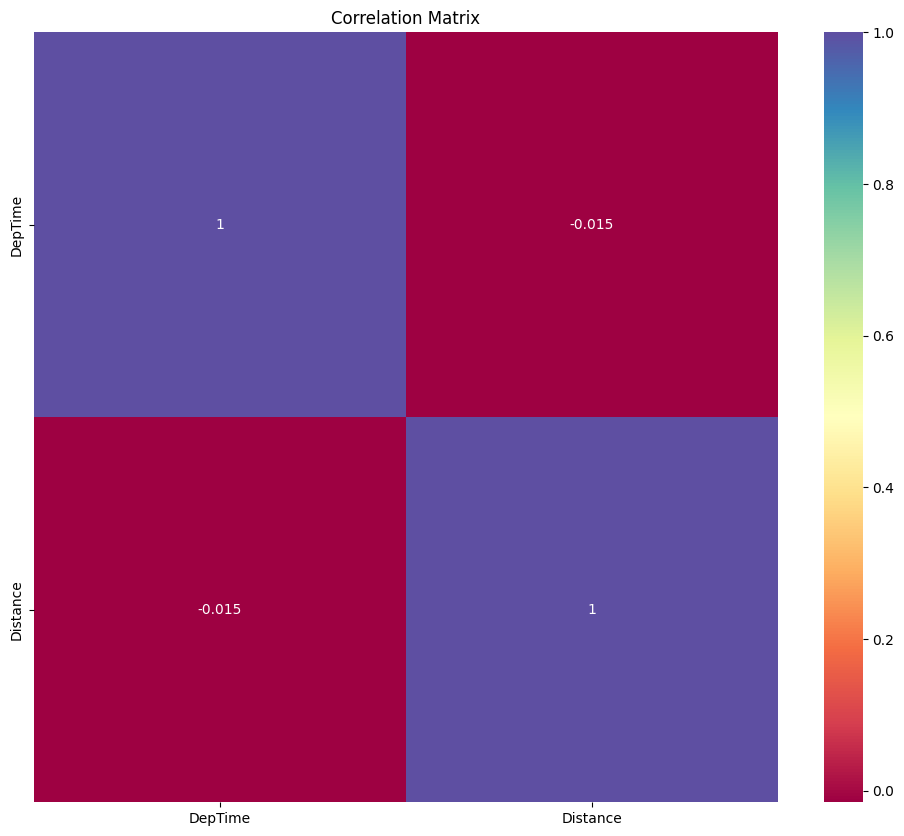

In [82]:
corr = dt.select_dtypes(include='number').corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")


In [83]:
dt.sample(3)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
90541,c-6,c-3,c-7,1400,EV,DHN,ATL,171
53092,c-2,c-5,c-1,1930,AA,SJU,MCO,1189
66765,c-6,c-19,c-2,1834,WN,SNA,SMF,404


In [84]:
y=dt['Distance']
print(y.shape)
print()
y.head()

(100000,)



0     598
1    1235
2     577
3     377
4     258
Name: Distance, dtype: int64

In [85]:
x=dt.drop(columns=['Distance','Origin','Dest','Month'])

In [86]:
x.head()

,DayofMonth,DayOfWeek,DepTime,UniqueCarrier
0,c-25,c-3,615,YV
1,c-17,c-2,739,WN
2,c-2,c-7,651,MQ
3,c-25,c-7,1614,WN
4,c-6,c-3,1505,UA


In [87]:
print(x.shape)
print(y.shape)

(100000, 4)
(100000,)


In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,  train_size=0.7, random_state=1)

In [89]:
print(x.shape)
print(y.shape)
print()
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

(100000, 4)
(100000,)

(70000, 4)
(70000,)

(30000, 4)
(30000,)


In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
model = LinearRegression()

In [92]:
x_train_numeric = x_train.select_dtypes(include='number')
model.fit(x_train_numeric, y_train)


LinearRegression()

In [93]:
x_test = x_test.select_dtypes(include='number')
predict = model.predict(x_test)


In [94]:
predict[:4]

array([732.40652768, 722.73427072, 713.33319853, 712.2846174 ])

In [95]:
x_train = x_train.select_dtypes(include='number')
x_test = x_test.select_dtypes(include='number')
model.fit(x_train, y_train)
print("Accuracy of training dataset:", model.score(x_train, y_train))
print("Accuracy of test dataset:", model.score(x_test, y_test))

Accuracy of training dataset: 0.00023937028963050277
Accuracy of test dataset: 0.00019319323585953452


# Actual VS Predicted

In [96]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [97]:
test = pd.DataFrame({
    'Y test':y_test,
    'Y test predicted':y_pred_test
})
train = pd.DataFrame({
    'Y train':y_train,
    'Y train predicted':y_pred_train
})

In [98]:
test.sample(10)

,Y test,Y test predicted
63241,256,726.693568
70304,328,712.031512
399,585,733.943241
48951,2421,715.828098
22496,407,717.635997
67283,1340,729.911628
15306,1020,710.151297
77495,373,716.135441
94513,712,713.929805
38886,187,731.484499


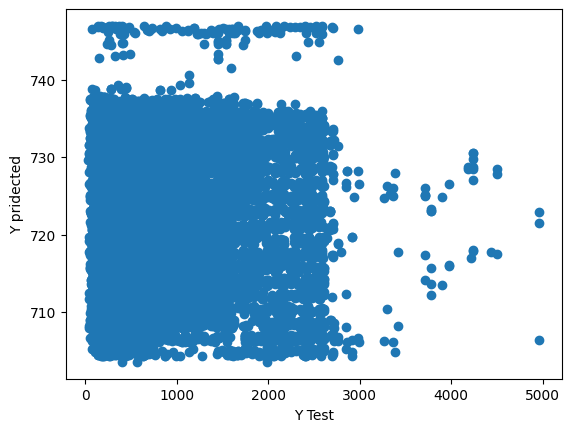

In [99]:
import matplotlib.pyplot as plt 
plt.scatter(y_test,predict)
plt.xlabel('Y Test')
plt.ylabel('Y pridected')
plt.show()

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [101]:
from math import sqrt
print('MAE = ', mean_absolute_error(y_test,predict))

MAE =  425.9713118443597


In [102]:
print('MSE =', mean_squared_error(y_test,predict))

MSE = 323275.55611215835


In [103]:
print('RMSE = ', sqrt(mean_squared_error(y_test,predict)))

RMSE =  568.5732636276158


In [104]:
numeric_dt = dt.select_dtypes(include='number')
corr = numeric_dt.corr()

In [105]:
dt.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577


# prediction

In [106]:
user = pd.DataFrame([[31.926272],[11.109461],[37.268959],[2.664034]]) 

In [107]:
result = model.predict(user)
result

C:\Users\MSI\anaconda3\envs\Joya\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([746.36483701, 746.74118382, 746.26824665, 746.89386857])